# Welcome to the University of Illinois administrative office!

We are so thankful that you agreed to take a look at our salary data. We have a dataset for you that we need you to perform some analysis on and create some plots that we can show the state to get funding for another year. Further details follow below.

Thanks again!
 
\- Chancellor Kelly

## Lab: Plots

In this lab, you will:

- Work with real UIUC salary data to explore some of the statistics that we talked about in class: mean, median, mode, standard deviation, and quartiles!
- Practice creating plots to visualize quantitative data: boxplots, scatter plots, and histograms

In [2]:
ta_name = "Anku"
ca1_name = "DEAN"
ca2_name = "JASMINE"

partner1_name = "Cam"
partner1_netid = "cr13"
partner1_major = "ECONOMETRICS"
partner1_qotd_answer = "KARLE"

partner2_name = "EMILIE"
partner2_netid = "EMILIES2"
partner2_major = "linguistics"
partner2_qotd_answer = "karle"

partner3_name = "nima"
partner3_netid = "nimas2"
partner3_major = "IS"
partner3_qotd_answer = "wade"

partner4_name = ""
partner4_netid = ""
partner4_major = ""
partner4_qotd_answer = ""

# 0. Import the Data

In the same directory as this notebook find the dataset that is provided.  You know what to do to import the libraries and read the data! :)

In [4]:
import pandas as pd
df= pd.read_csv("graybook.csv")

# 1. The Basics


## Exploring measures of center: Mean, Median, and Standard Deviation

The first thing we need from you is to get us some basics statistics at both a university and department level. We need to know:
1. the number of employees at UIUC
2. the mean salary
3. the median salary
4. the standard deviation

In [6]:
university_num_emp = len(df)
university_num_emp



3555

In [7]:
university_mean_sal = df['Salary'].mean()
university_mean_sal



101284.91668642394

In [8]:
university_median_sal = df['Salary'].median()
university_median_sal



86995.0

In [9]:
university_std_sal = df['Salary'].std()
university_std_sal



55129.29496464772

In [10]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
x = university_num_emp + university_mean_sal + university_median_sal + university_std_sal
y = ((university_mean_sal - university_median_sal) * university_std_sal) / university_num_emp

assert( abs(x - 246964.21165107167) < 1 ), "It looks like your calculations are off?"
assert( abs(y - 221601.415478511) < 1 ), "It looks like your calculations are off?"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Department-level Data

Now we need the same data at a department level. In other words, you want each of those statistics for each department.  There was a certain function you learned a bit ago that will help you **group** all of the people in each department so you can find departmental aggregates.

Instead of just grouping by a single aggregate, use **Python list syntax** to aggregate to find the `count`, `mean`, and `median`.  After that, select only the `'Primary Department'` and `'Salary'` data.

*(You can view technical docs here:
https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)*

In [28]:
group = df.groupby("Primary Department").agg(["mean","count", "median"]).reset_index()
agg_df = group[["Primary Department", "Salary"]]



# Display 5 random rows to make sure it works:
agg_df.sample(5)

Primary Department         Salary                
                                             mean count    median
82   Human Dvlpmt & Family Studies   73734.806047    43   65149.0
35    Chemical & Biomolecular Engr  114500.126538    26  105770.0
65      Engr Shared Admin Services   70328.164615    13   68500.0
54  E Asian & Pacific Studies Cntr   58417.800000     1   58417.8
58        Education Administration   81850.140417    24   67438.0

In [29]:
## == TEST CASES for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( len(agg_df) == 140 ), "You should have 140 different departments.  Check to make sure you grouped the data?"
assert( "Salary" in agg_df ), "You must have a salary output"
assert( "mean" in agg_df["Salary"] ), "Make sure you have a mean in your salary"
assert( "count" in agg_df["Salary"] ), "Make sure you have a count in your salary"
assert( "median" in agg_df["Salary"] ), "Make sure you have a median in your salary"
assert( len(agg_df.columns) == 4 ), "Make sure you have ONLY the salary data and the department"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


Your boss is thrilled with the numbers you've come up with! Now she's ready to go to the state to ask for money. To know how much to ask for, she wants you to **add a column** to the department-grouped DataFrame that is equal to the **mean** salary of that department multiplied by the number of people in that department. She wants you to provide her with this table and the sum of all of the values in this column.

Hop to it!

In [42]:
agg_df['MeanMulCount'] = agg_df['Salary', "mean"] * agg_df['Salary', 'count']


# Display 5 random rows to make sure it works:
agg_df.sample(5)

C:\Users\yundo\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Primary Department         Salary                    \
                                             mean count      median   
68       Fine & Applied Arts Admin   74298.004815    27   74174.000   
25                    Biochemistry  116513.786429    14  102702.995   
121  Russian,E European,Eurasn Ctr   50783.500000     2   50783.500   
4        Aces Info Tech & Cmc Svcs   71087.565652    23   70582.130   
91                      Journalism  102709.371250    16   91948.650   

    MeanMulCount  
                  
68    2006046.13  
25    1631193.01  
121    101567.00  
4     1635014.01  
91    1643349.94

In [50]:
# calculate the total sum of all of the values in the column you added
total_money_needed_mean = agg_df["MeanMulCount"].sum()

total_money_needed_mean

358852459.81999993

In [51]:
## == TEST CASES for Puzzle 1.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.

assert( abs(total_money_needed_mean - 358852459) < 1 ), "Looks like your multiplication did not work properly!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


# 2. Estimations

Great! Your boss is ready to go to the state with this number. Is this a good estimate of the amount of money she will need?

Let's calculate the standard deviation for each department to find out.  Remember, SD measures the spread around the average.  The larger the SD, the more spread out the numbers are from the average.

Add another column to your dataframe with the departmental data which holds the value of the standard deviation of the salaries for that department.  *(Hint: This may require you to re-group your original `df`)*

In [68]:
# add that column here!
group = df.groupby("Primary Department").agg(["mean","count", "median", "std"]).reset_index()
agg_df = group[["Primary Department", "Salary"]]




# Display 5 random rows to make sure it works:
agg_df.sample(5)



Primary Department         Salary                  \
                                             mean count    median   
121  Russian,E European,Eurasn Ctr   50783.500000     2  50783.50   
87                    IPM Delivery   43420.445000     4  40644.58   
65      Engr Shared Admin Services   70328.164615    13  68500.00   
116                  Plant Biology  110171.244000    15  94931.48   
139                      eLearning   69615.987143    14  62934.00   

                   
              std  
121  12959.145979  
87   31742.213040  
65   15079.004356  
116  58594.058989  
139  21457.566197

Are there any departments for which your boss' way of approximating the total salary would be fairly accurate? Are there deparments where it would not be an okay approximation?  *Hint*: It might be helpful to find the largest standard deviation!

In [66]:
#CTr wounded veteras higher ed has the lowest sd 
#entomology has the biggest sd

## EDIT THIS CELL:

- One department where it would be an okay approximation is: CTR wounded veterans

- One department where it would not be an okay approximation is: entomology

Well, I believe you that the mean salary isn't always a good approximation, but your boss doesn't. I think she is more of a visual learner. To help prove our point, let's make a histogram of the salaries in the computer science department.

## 2.1 Histograms
Create a histogram of the salaries within the computer science department. Pandas has a nice function that helps you accomplish this: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

Hint: in order to apply this function, you will need a DataFrame `cs_salary_df` with just the data for Computer Science professors.

Play around with putting different values as the *bin* parameter to the function. Which value would you select to present the data to your boss?  Remember, there is no right or wrong number of bins.  You want to pick an amount that allows you to see the overall shape of the histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEEF80A688>]],
      dtype=object)

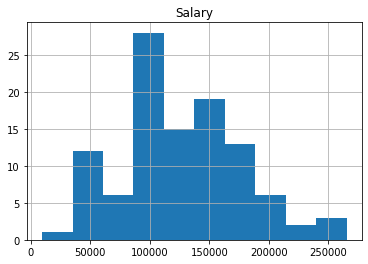

In [121]:

cs_salary_df = df[df["Primary Department"] == "Computer Science"]
cs_salary_df.hist('Salary', bins = 10)

# ...and then create your histogram:


In [122]:
## == TEST CASES for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert(cs_salary_df["Salary"].sum() == 13323600), "You are not showing the correct data in the histogram"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## 2.2 Boxplots

Ok, you've convinced her. Your boss no longer thinks that the average is a good approximation for each department. To explain to the state why this isn't the case, she wants you to create a plot that shows the distribution of the salaries for each department that is relatively compact (i.e., not 100 tiny histograms). A collection of box plots would work quite nicely!  This allows us to see different quartiles and if the departments have outliers!

But first, let's just make one box plot. Again, pandas has a nifty function that can help you do this: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

Make a box plot for the computer science department salaries.

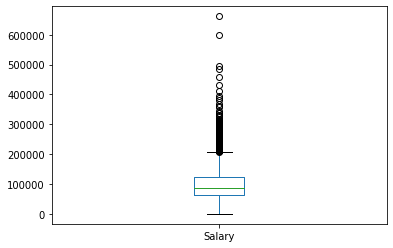

In [125]:
# Create your box plot of the CS salaries:
df['Salary'].plot.box()




## 2.3 New Estimating Method

Your boss notices some outliers in your boxplot and wants to try another estimation strategy to account for them. She has heard that the median is less likely to be distorted by extreme data points and wants to try using that for salary estimation instead of the mean.

Just like with the mean estimator, she wants you to **add a column** to the department-grouped DataFrame that is equal to the **median** salary of that department multiplied by the number of people in that department. She wants you to provide her again with this table and the sum of all of the values in this column.

In [128]:
agg_df['MedianMulCount'] = agg_df['Salary', "median"] * agg_df['Salary', 'count']



# Display 5 random rows to make sure it works:
agg_df.sample(5)

C:\Users\yundo\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Primary Department         Salary                    \
                                              mean count      median   
121   Russian,E European,Eurasn Ctr   50783.500000     2   50783.500   
39   Cline Ctr for Adv Social Rsrch   42556.296667     3   42032.000   
122   Sch Earth, Soc, Environ Admin   75622.455714     7   67001.000   
25                     Biochemistry  116513.786429    14  102702.995   
62        Engineering General Expen   79985.666667     3   86888.000   

                  MedianMulCount  
              std                 
121  12959.145979      101567.00  
39    1673.229914      126096.00  
122  18798.794737      469007.00  
25   52122.432218     1437841.93  
62   12991.395011      260664.00

In [140]:
# calculate the total sum of all of the values in the column you added
total_money_needed_med = agg_df['MedianMulCount'].sum()

total_money_needed_med

332199238.08000004

In [141]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.

assert( abs(total_money_needed_med - 332199238) < 1 ), "Looks like your multiplication did not work properly!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


# 3. Confronting your boss
After spending days creating plots, you finally decide to tell your boss that there is an easier way to find out how much money you should request from the state to pay university salaries. Find the exact total amount of money that will be needed to pay everyone in the dataset.

In [148]:
# your code goes here!
total_money = df["Salary"].sum()
total_money


358852459.82

In [150]:
## == TEST CASES for Puzzle 3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.

assert(abs(total_money - 358852459) < 1), "Are you sure the total is correct?"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


# 4. Estimation Error
Your boss is very pleased with your data science knowledge! She would like to see by how much your original estimates were off. Find the exact error (difference) of the mean estimation method and the exact amount needed and then repeat for the median estimate method.

In [165]:
#calculate the error of the mean estimation method
mean_estimate_error = total_money_needed_mean - total_money

mean_estimate_error

-5.960464477539063e-08

In [167]:
#calculate the error of the med estimation method
med_estimate_error = total_money_needed_med - total_money

med_estimate_error

-26653221.73999995

In [169]:
## == TEST CASES for Puzzle 4 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.

assert(abs(mean_estimate_error - (-5.9605e-08)) < 1.0e-07), "Are you sure the error for the mean estimate is correct?"
assert(abs(med_estimate_error - (-26653221)) < 1), "Are you sure the error for the median estimate is correct?"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## EDIT THIS CELL:

- The method that resulted with the least error was: mean estimate error
- With an error of: -5.960464477539063e-08

## 4. Your Department

You're awesome!  Now find something interesting about your home department... maybe a box plot or a scatter plot, do whatever interests you, it does not have to be complex (but totally can be!)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEF0F87FC8>]],
      dtype=object)

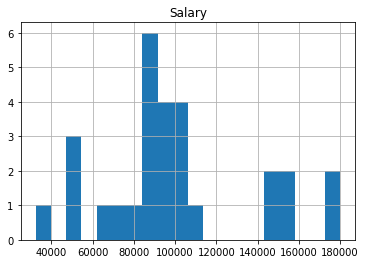

In [182]:
stats_salary_df = df[df["Primary Department"] == "Statistics"]
stats_salary_df.hist('Salary', bins = 20)

## Submit Your Work

You're almost done -- congratulations! 🎉

You need to do a few more things:

1. Save your work.  To do this, create a **notebook checkpoint** by using the menu within the notebook to go **File -> Save and Checkpoint**


2. After you have saved and checkpointed, exit this notebook by going to **File -> Close and Halt**


3. Once you have closed your notebook select **Quit** on the **Jupyter main page** to stop the Jupyter server


4. Return to the Data Science Discovery page on how to use git to turn this notebook into the course!